In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve

# Load your dataset
heart = pd.read_csv("heart_failure.csv")

# Preview the dataset to understand its structure
print(heart.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [8]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
38   60.0        0                      2656         1                 30   
46   51.0        0                      1380         0                 25   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
107  45.0        1                      1876         1                 35   
130  53.0        1                      1808         0                 60   
134  81.0        0                      4540         0                 35   
139  50.0        0                      1548         0                 30   
147  64.0        0                      1610         0                 60   

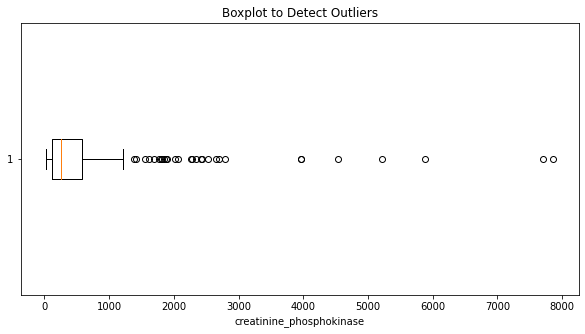

In [9]:
# Choose a column to check for outliers
column = 'creatinine_phosphokinase'

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = heart[column].quantile(0.25)
Q3 = heart[column].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = heart[(heart[column] < lower_bound) | (heart[column] > upper_bound)]
print(outliers)

# Visualize the data and outliers using a boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(heart[column], vert=False)
plt.title('Boxplot to Detect Outliers')
plt.xlabel(column)
plt.show()

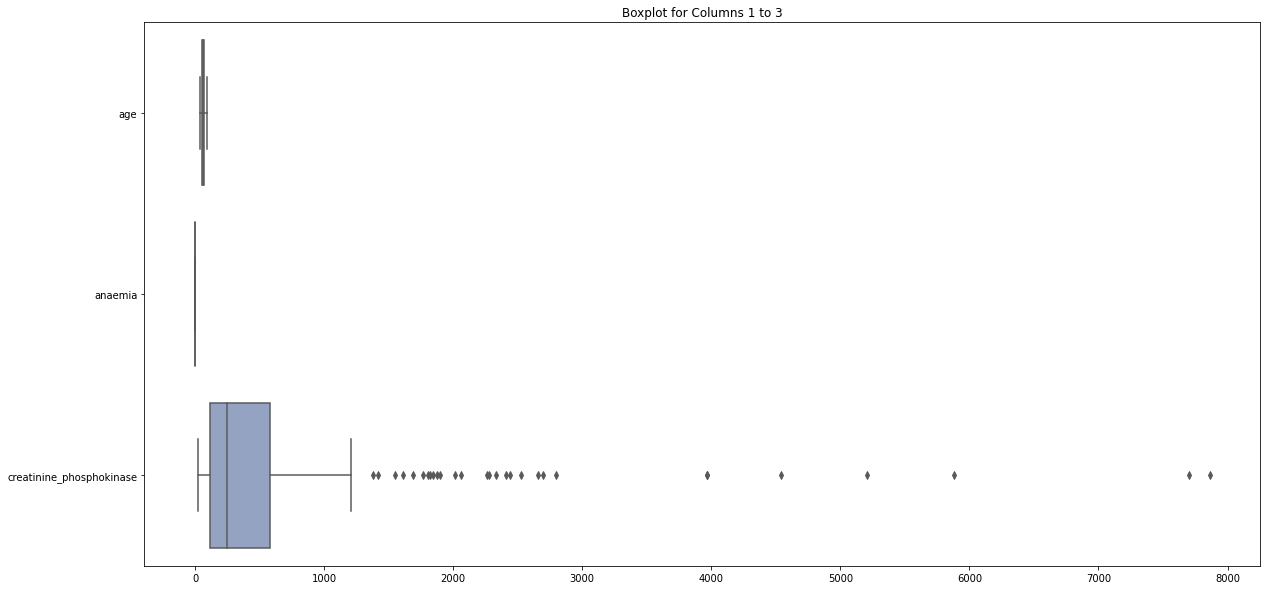

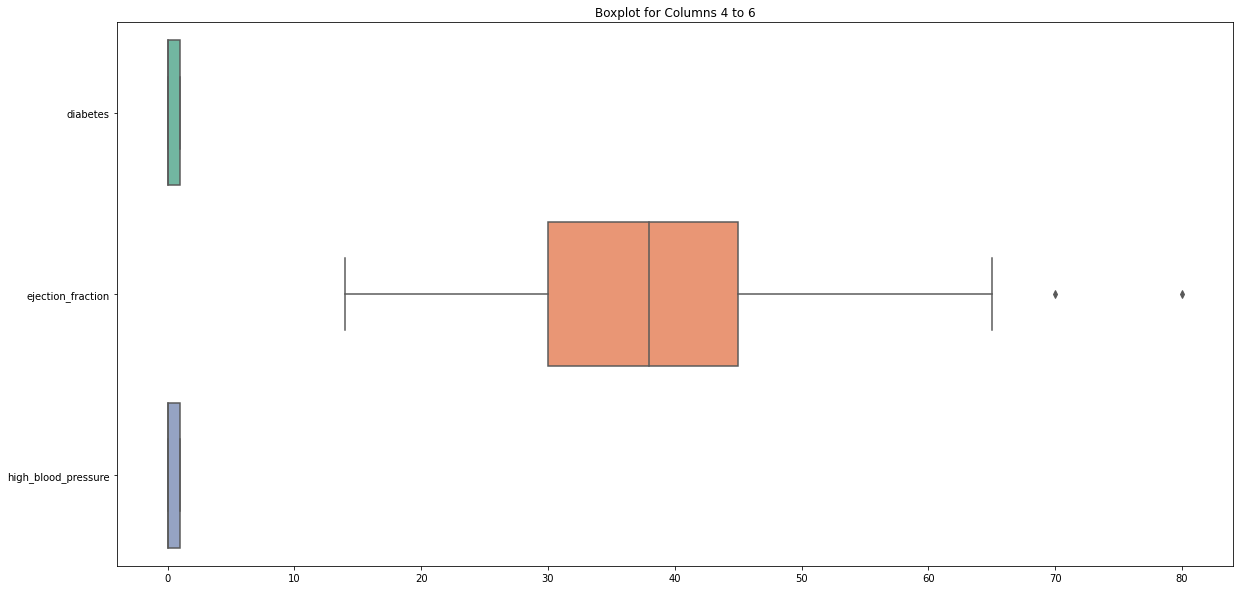

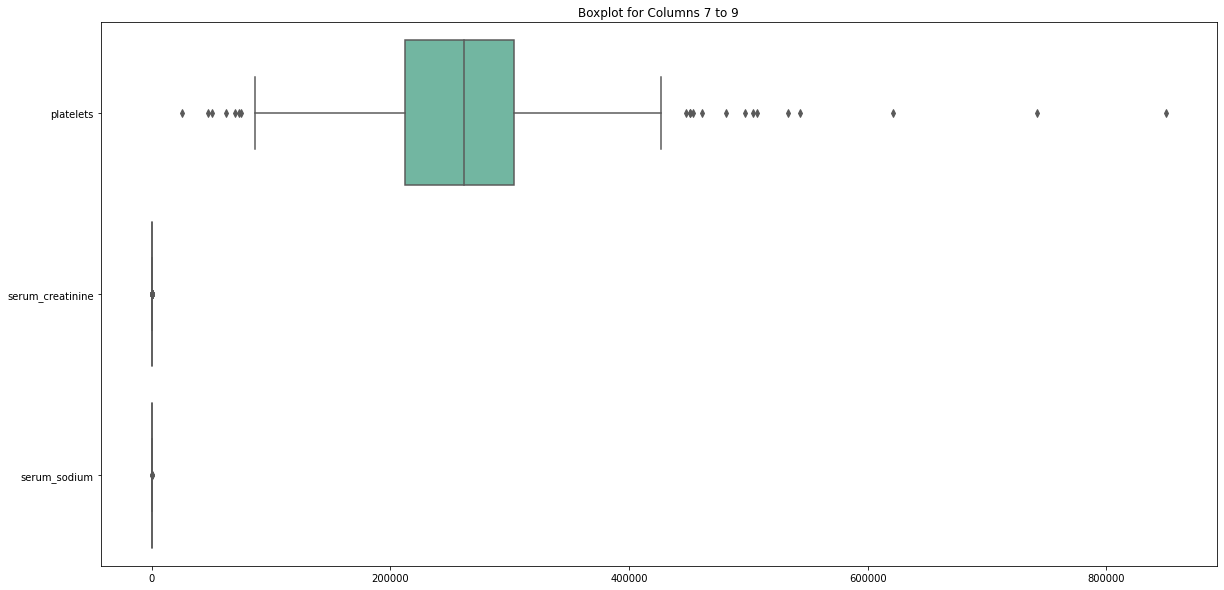

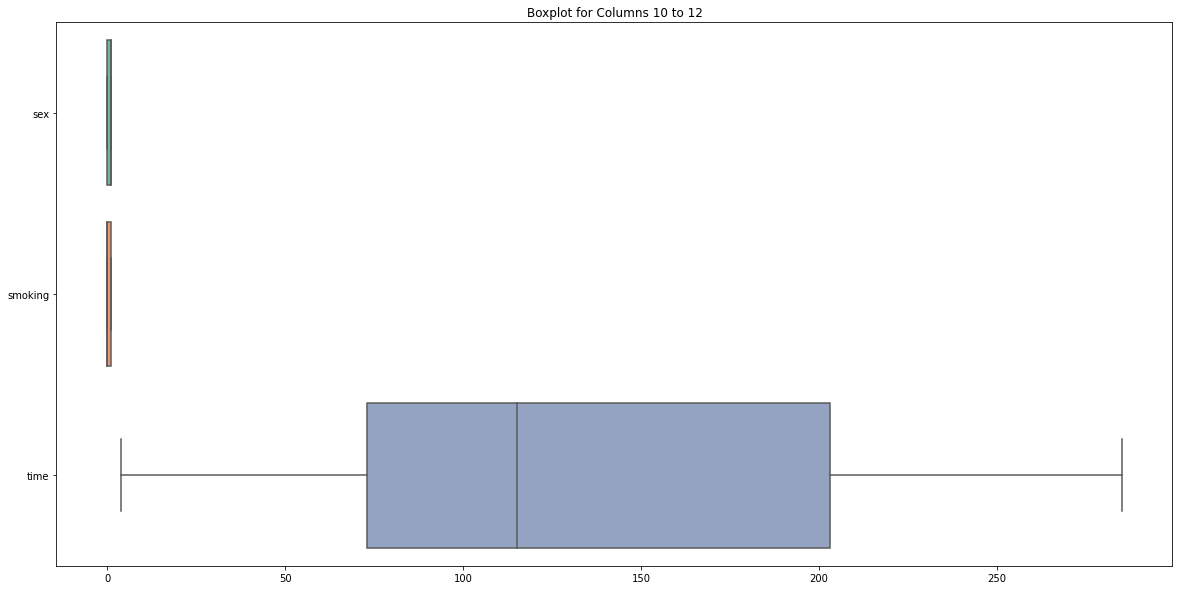

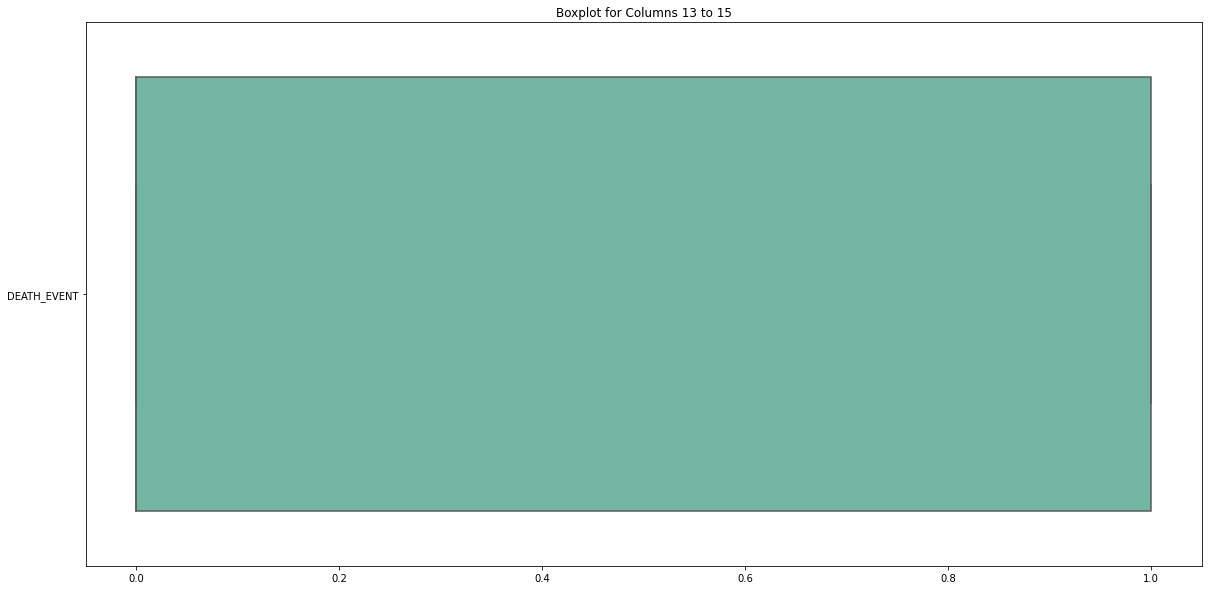

In [10]:
def plot_groups(data, group_size):
    columns = data.columns
    for i in range(0, len(columns), group_size):
        plt.figure(figsize=(20, 10))
        sns.boxplot(data=data.iloc[:, i:i+group_size], orient="h", palette="Set2")
        plt.title(f'Boxplot for Columns {i+1} to {i+group_size}')
        plt.show()

plot_groups(heart, 3)


In [11]:
heart.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
counts = heart['sex'].value_counts()
counts

1    194
0    105
Name: sex, dtype: int64

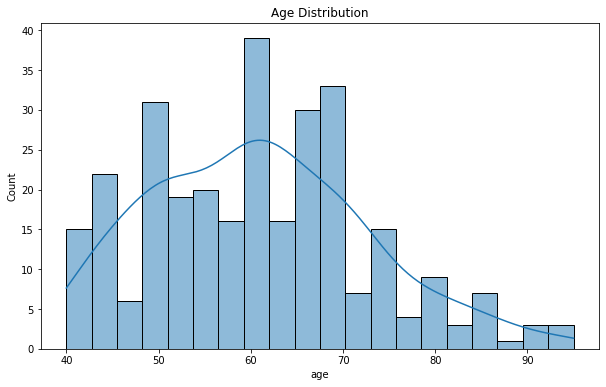

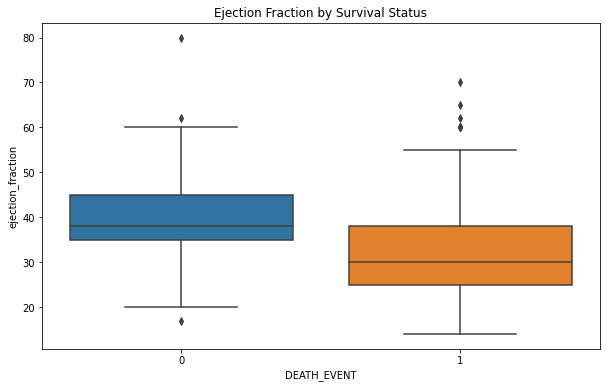

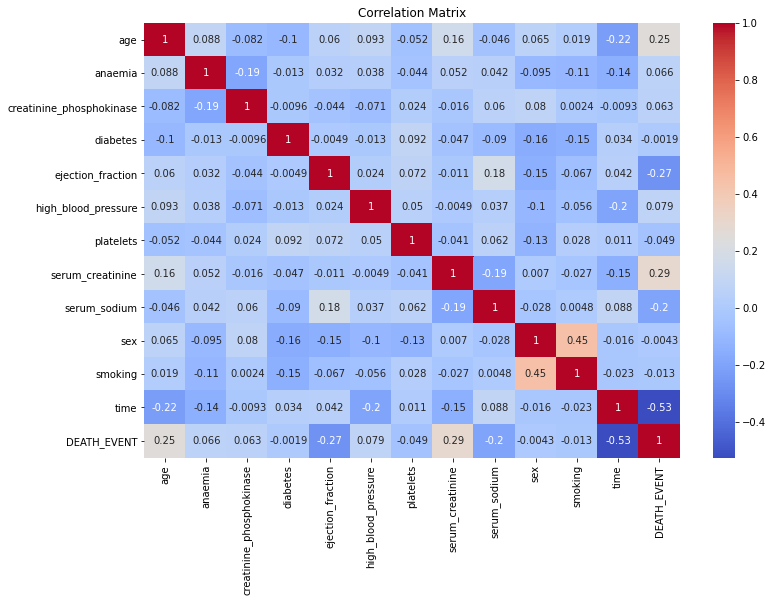

In [48]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(heart['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=heart)
plt.title('Ejection Fraction by Survival Status')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = heart.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


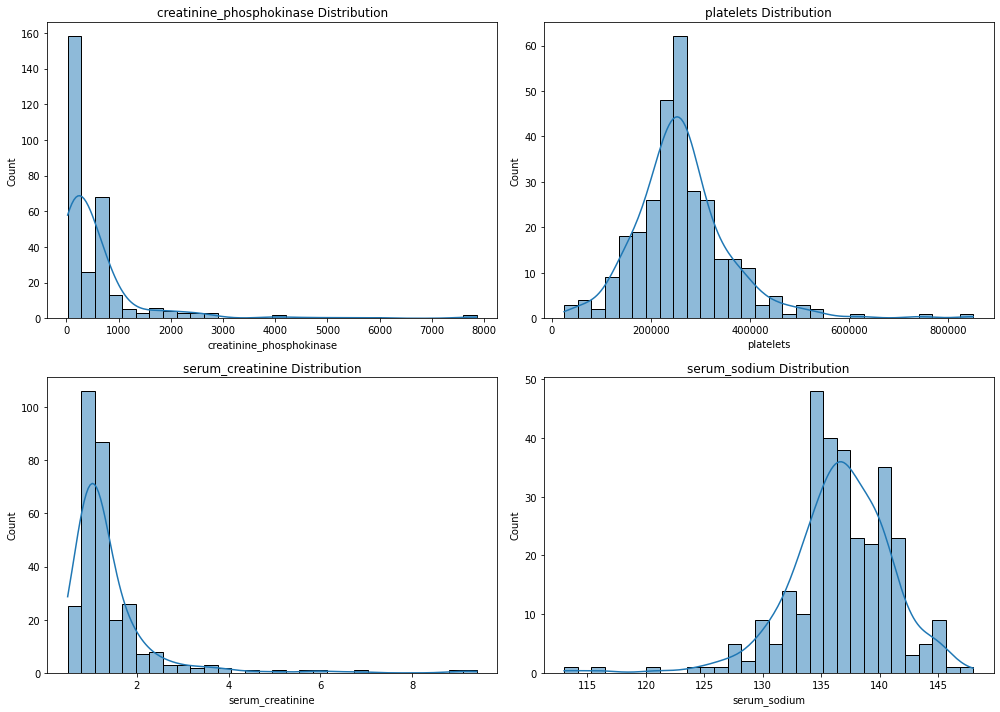

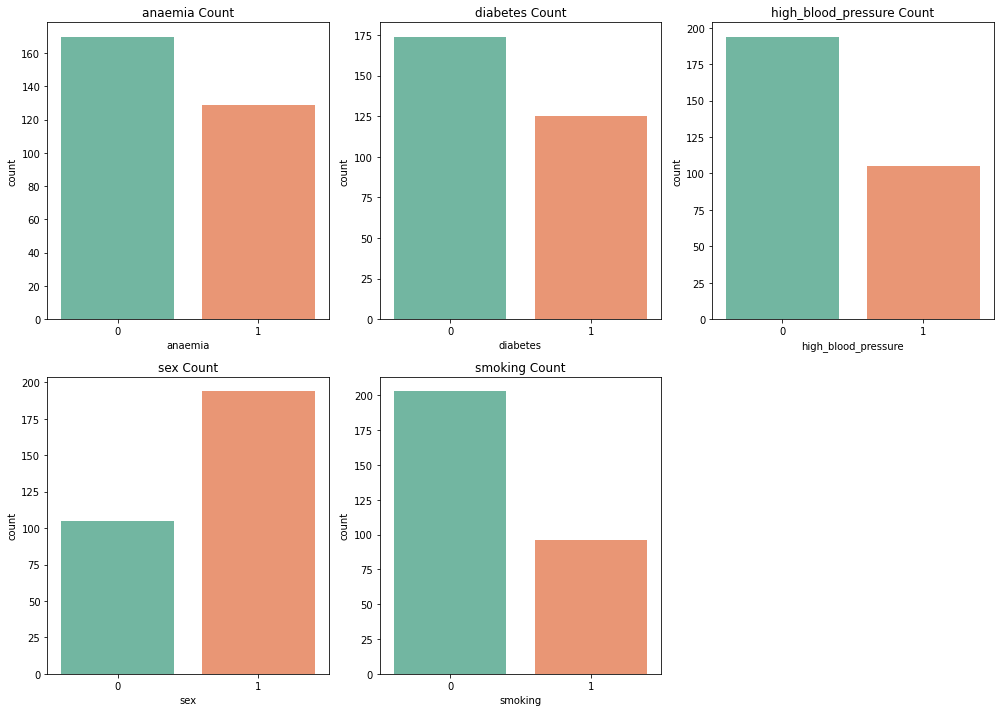

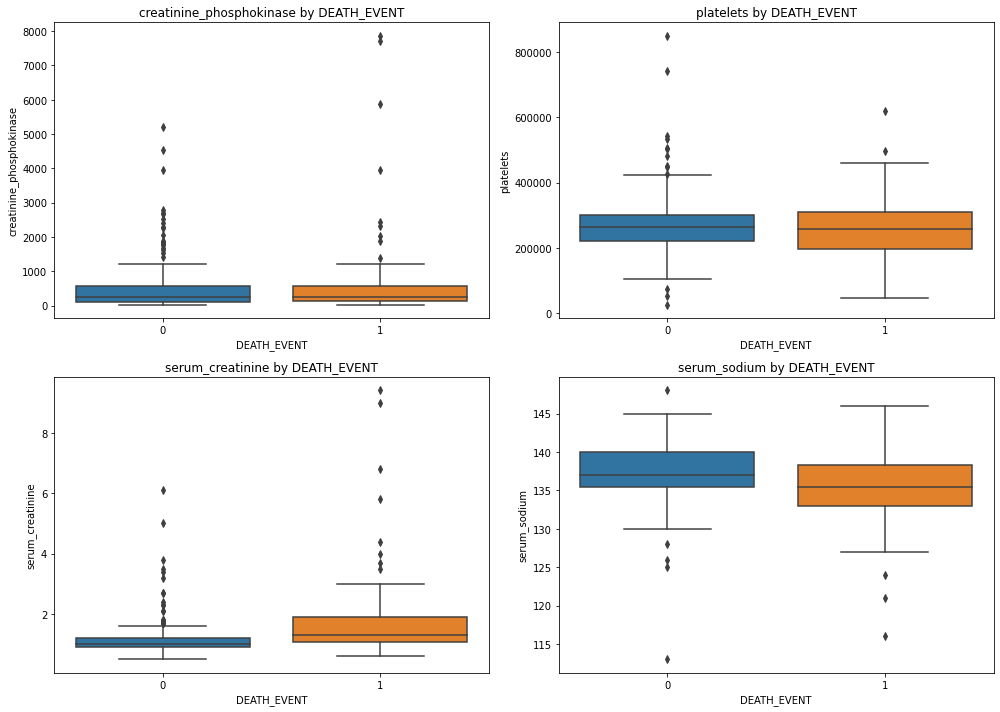

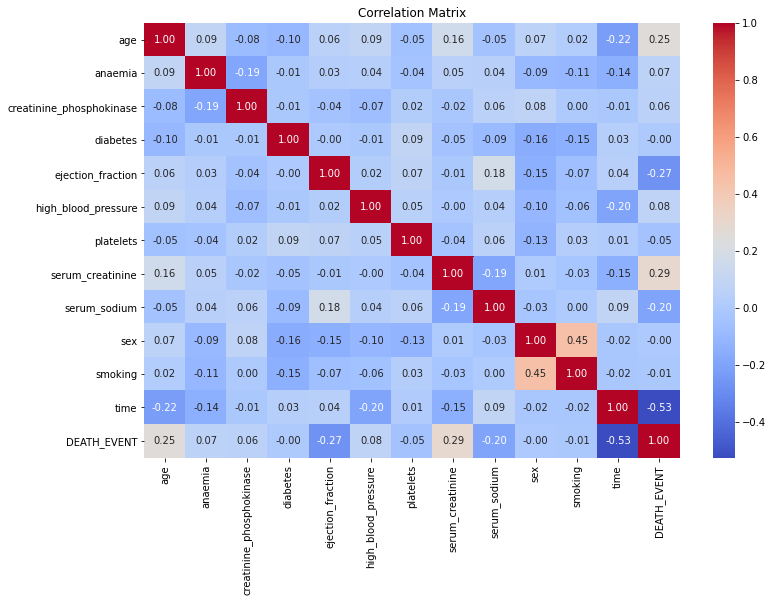

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'heart'
df = heart

# Histogram for Continuous Variables
plt.figure(figsize=(14, 10))
continuous_vars = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'{var} Distribution')
plt.tight_layout()
plt.show()

# Count Plot for Categorical Variables
plt.figure(figsize=(14, 10))
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(f'{var} Count')
plt.tight_layout()
plt.show()

# Box Plots for Continuous Variables by DEATH_EVENT
plt.figure(figsize=(14, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='DEATH_EVENT', y=var, data=df)
    plt.title(f'{var} by DEATH_EVENT')
plt.tight_layout()
plt.show()


# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


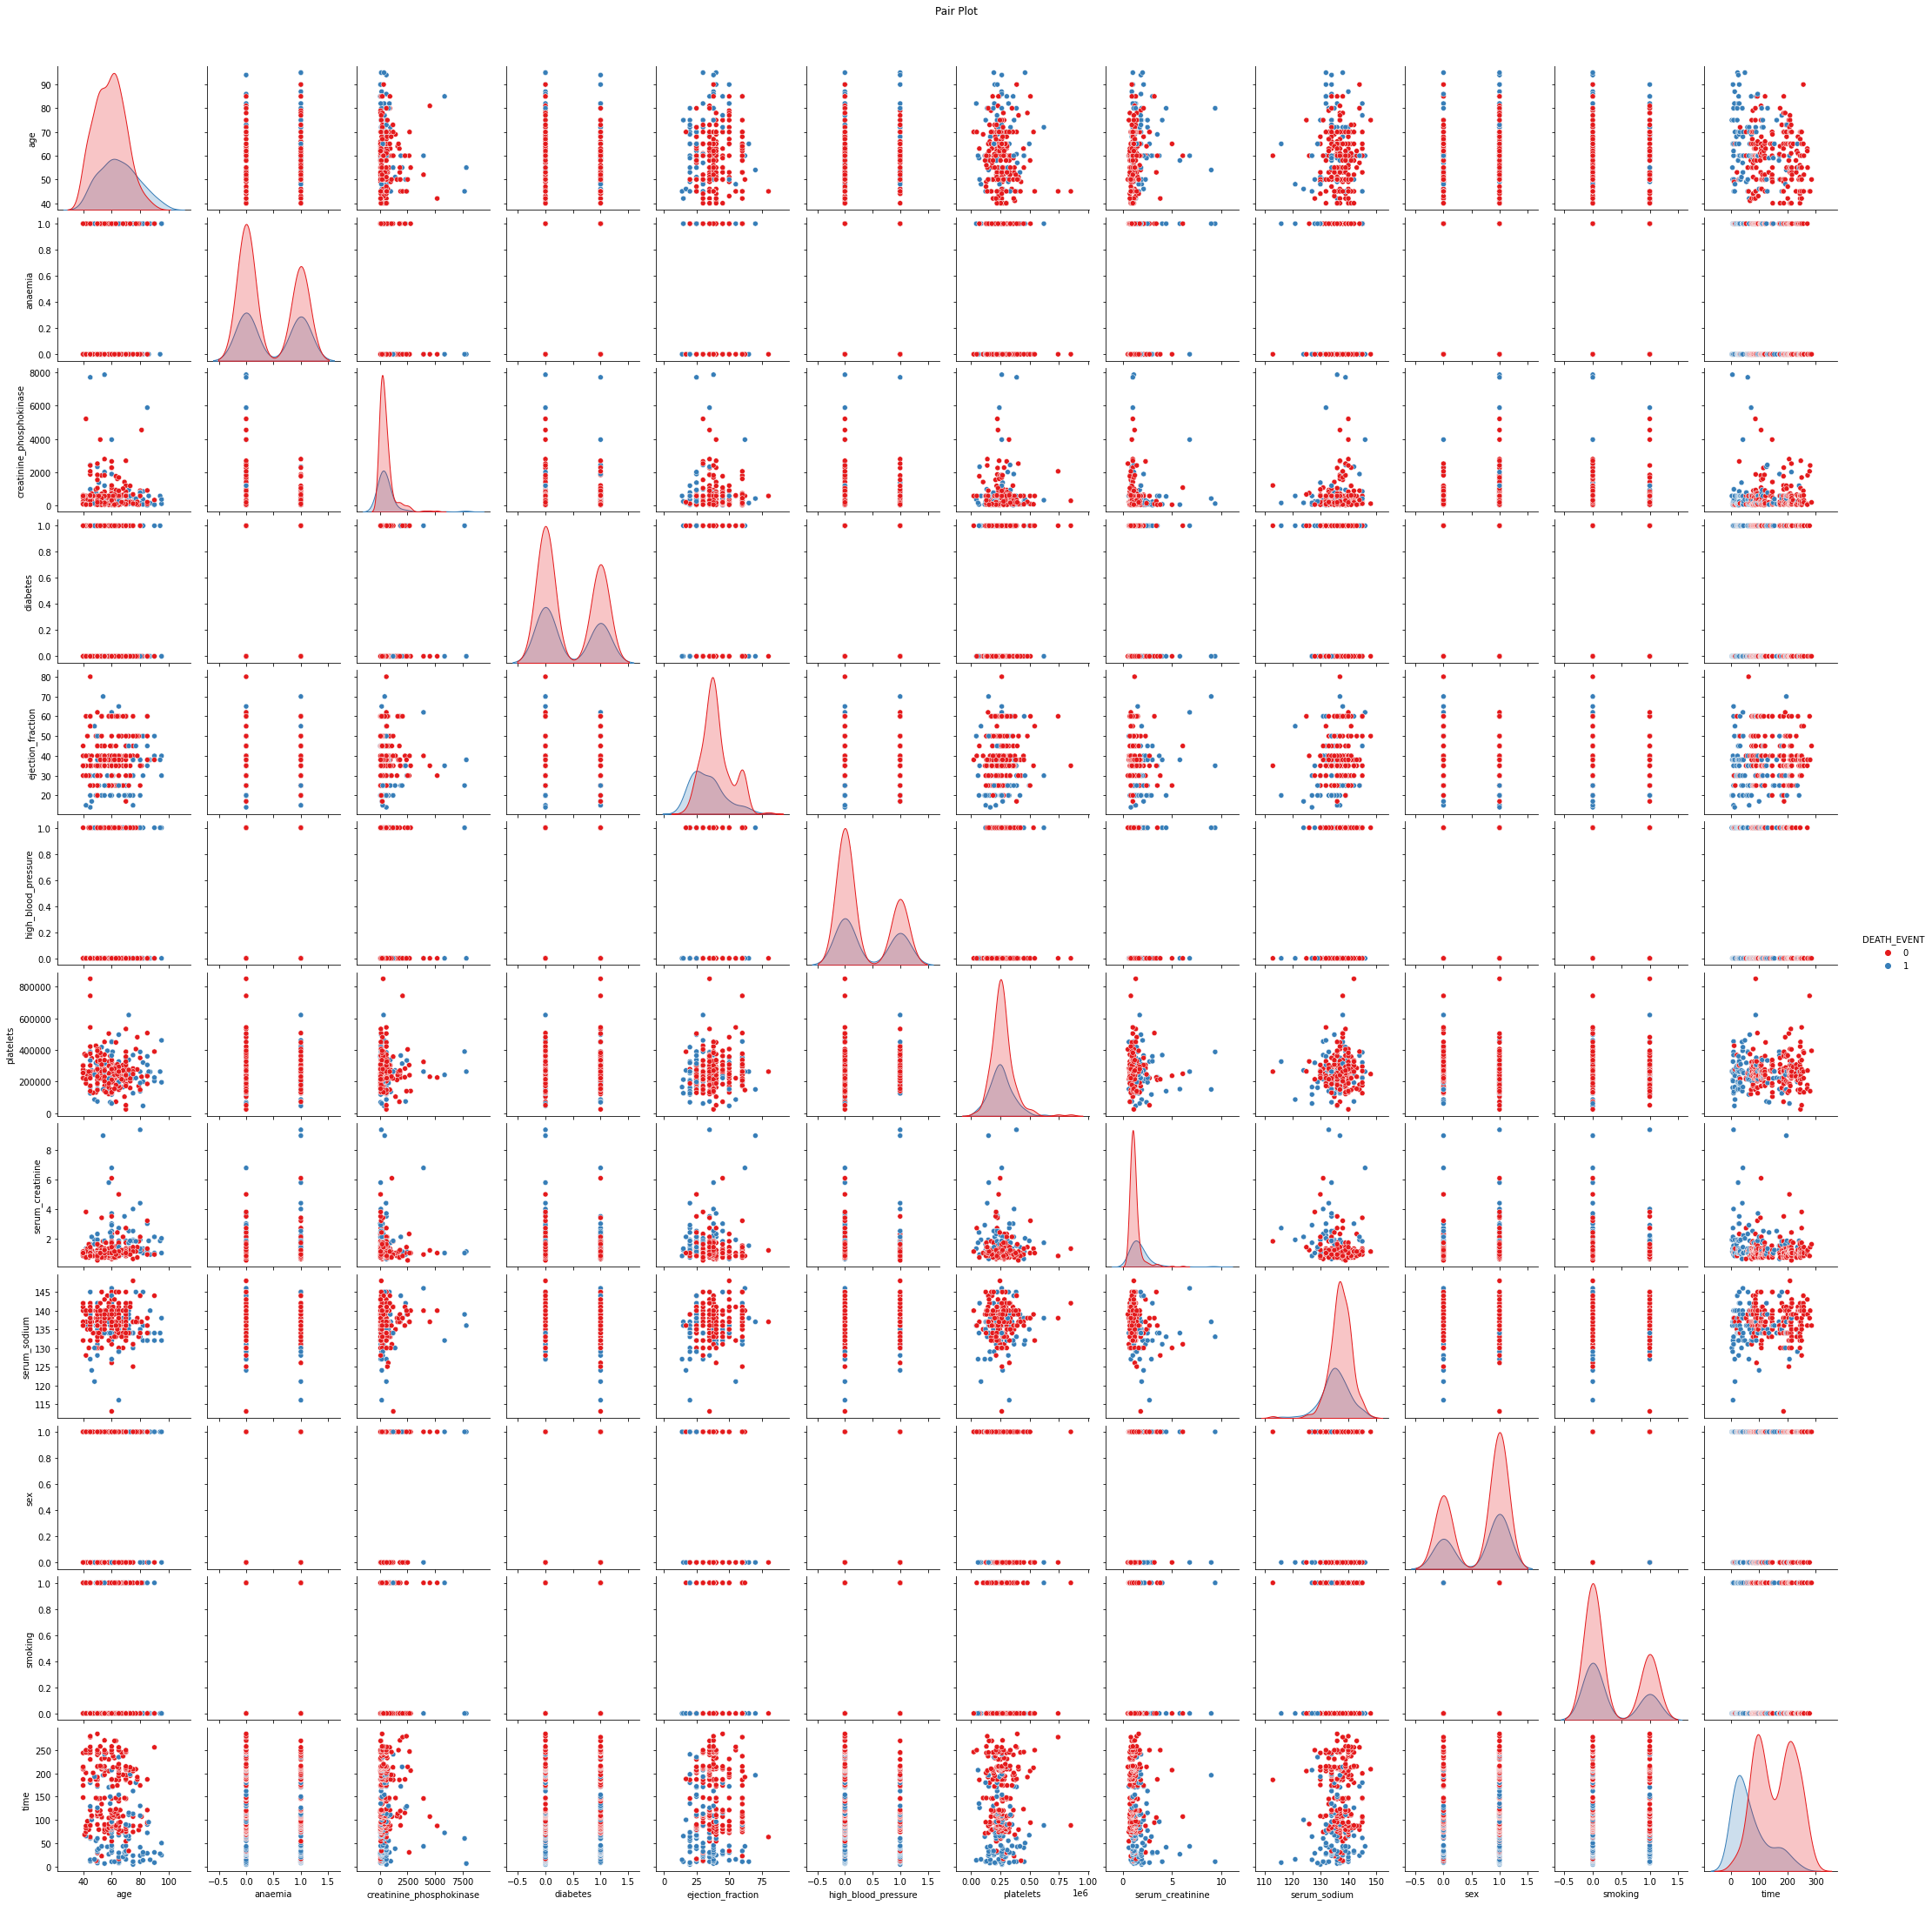

In [50]:
# Pair Plot
sns.pairplot(df, hue='DEATH_EVENT', palette='Set1')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

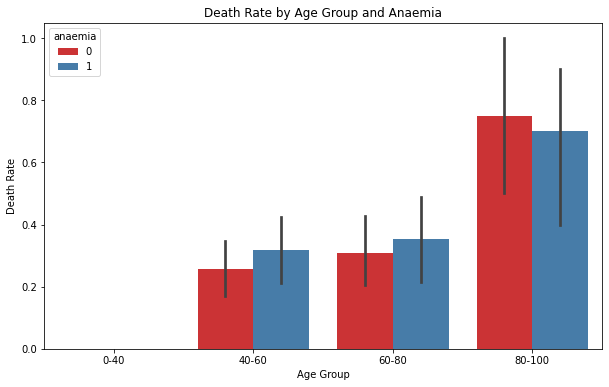

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'heart'
df = heart

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100], labels=['0-40', '40-60', '60-80', '80-100'])

# Plot death rate by age group and anaemia
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='DEATH_EVENT', hue='anaemia', data=df, palette='Set1')
plt.title('Death Rate by Age Group and Anaemia')
plt.ylabel('Death Rate')
plt.xlabel('Age Group')
plt.show()


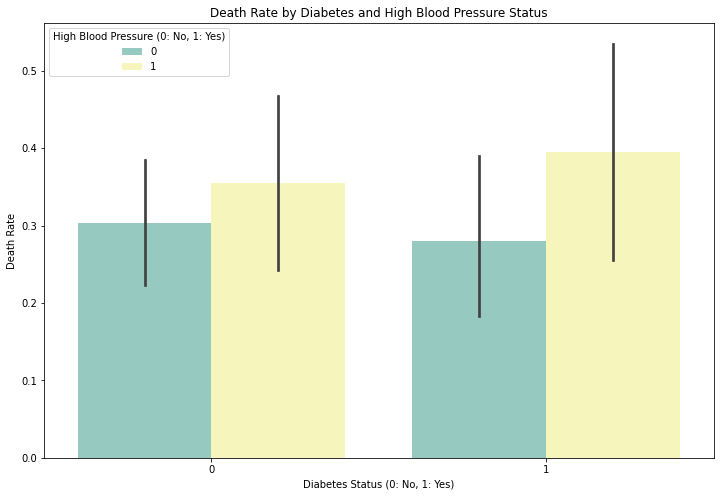

In [19]:
# Combined Bar Plot for Death Rate by Diabetes and High Blood Pressure Status
plt.figure(figsize=(12, 8))
sns.barplot(x='diabetes', y='DEATH_EVENT', hue='high_blood_pressure', data=df, palette='Set3')
plt.title('Death Rate by Diabetes and High Blood Pressure Status')
plt.ylabel('Death Rate')
plt.xlabel('Diabetes Status (0: No, 1: Yes)')
plt.legend(title='High Blood Pressure (0: No, 1: Yes)')
plt.show()


Accuracy: 0.8222222222222222
Confusion Matrix:
 [[58  3]
 [13 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.84      0.55      0.67        29

    accuracy                           0.82        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.82      0.81        90

ROC AUC Score: 0.8835500282645563


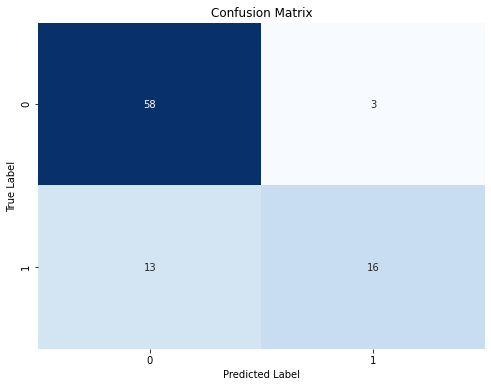

<Figure size 576x432 with 0 Axes>

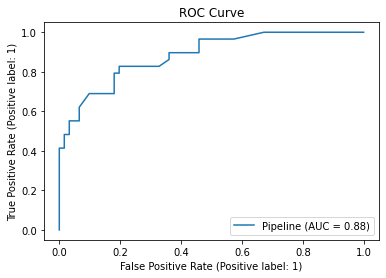

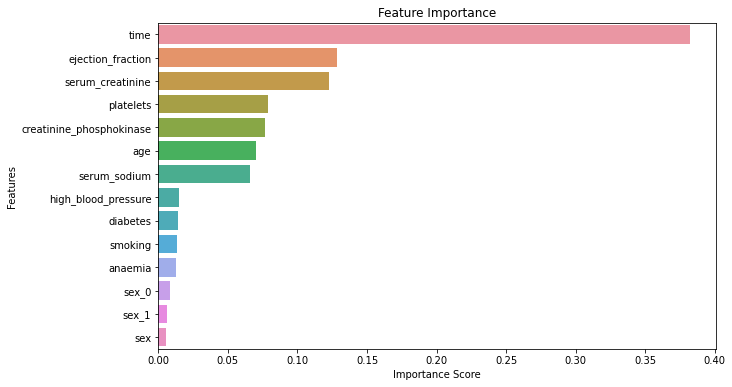

In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve

# Define the features and target variable
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Identify categorical features (assuming 'sex' is the only categorical feature)
categorical_features = ['sex']

# Preprocessing pipeline for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Define the complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Train the Random Forest Classifier using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC curve (Correct usage)
plt.figure(figsize=(8, 6))
plot_roc_curve(pipeline, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Plot feature importance
importances = pipeline.named_steps['classifier'].feature_importances_
numeric_feature_names = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names(categorical_features).tolist()  # Fixed here
feature_names = numeric_feature_names + onehot_feature_names

feature_importance = pd.Series(importances, index=feature_names)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
